In [2]:
import ugradio 
import ugradio.sdr
import ugradio.dft
import numpy as np
import astropy
import matplotlib.pyplot as plt

In [3]:
radio = ugradio.sdr.SDR(device_index=0)

Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
Enabled direct sampling mode, input 2
Exact sample rate is: 2200000.014570 Hz


In [ ]:
radio?


In [ ]:
help(radio)

In [4]:
fs = 1.0e6
N = 262144
try:
    radio.sample_rate = fs
except Exception:
    radio.sample_rate(fs)
    
try:
    x = radio.read_samples(N)
except Exception:
    try:
        x = radio.read_samples(N)
    except Expection: 
        x = radio.capture_data(N)
        
x = np.asarray(x)
print(x)

Exact sample rate is: 1000000.026491 Hz


[-0.05098039-0.15294118j -0.01960784+0.15294118j  0.09019608-0.1372549j
 ...  0.56078431+0.00392157j  0.63137255+0.00392157j
  0.62352941+0.00392157j]


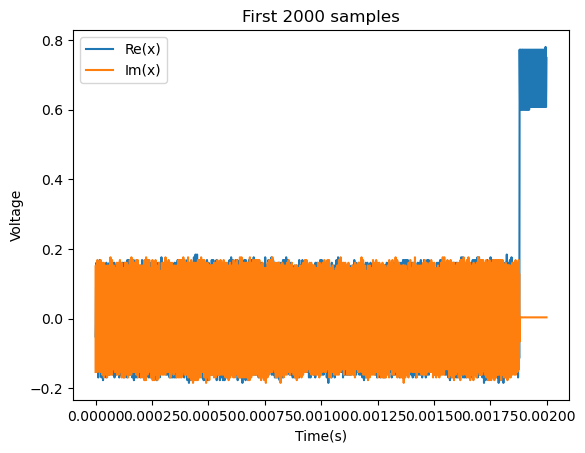

In [5]:
t = np.arange(N) / fs

plt.figure()
if np.iscomplexobj(x): 
    plt.plot(t[:2000], np.real(x[:2000]), label='Re(x)')
    plt.plot(t[:2000], np.imag(x[:2000]), label='Im(x)')
    plt.legend()
else:
    plt.plot(t[:2000],x[:2000])
    
plt.xlabel("Time(s)")
plt.ylabel("Voltage")
plt.title("First 2000 samples")
plt.show()

Exact sample rate is: 1000000.026491 Hz
/tmp/ipykernel_3072/3486648840.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  data = data.astype(np.float32)


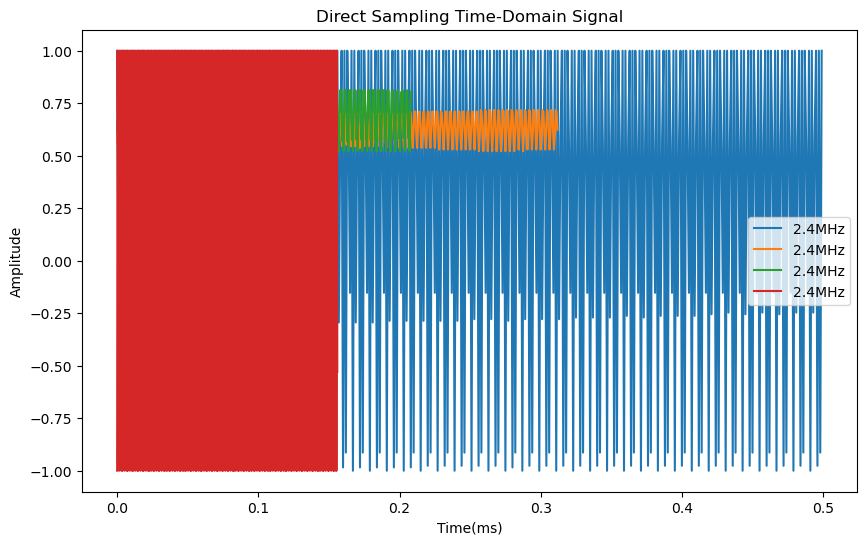

In [5]:
samples = [1.0e6, 1.6e6, 2.4e6, 3.2e6]
nsamples = 4096

plt.figure(figsize=(10,6))
for hehe in samples:
    radio.sample_rate = hehe
    data = radio.read_samples(nsamples)
    data = data.astype(np.float32)
    t = np.arange(500)/hehe
    plt.plot(t*1e3,data[:500], label=f'{fs/1e6:.1f}MHz')
plt.xlabel('Time(ms)')
plt.ylabel("Amplitude")
plt.title('Direct Sampling Time-Domain Signal')
plt.legend()
plt.show()